In [11]:
# Imports
%matplotlib inline

import sys
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import binom
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('darkgrid')
np.random.seed(4)

In [12]:
class IndependentAgent:
    def __init__(self, T, R):
        self.T = T #total amount of iterations
        self.R = R #
        self.n_arms = len(R)
        self.N = np.zeros(self.n_arms) #number of times an arm has been pulled
        self.U = np.ones(self.n_arms) #upper bound for each arm
        self.cum_r = np.zeros(self.n_arms) #summation of all the reward retrieved
        self.hat_R = np.zeros(self.n_arms) #estimation of the reward, simple average
        self.B = np.zeros(self.n_arms) #confidence bound of each arm
        self.ind = np.zeros(self.T) #keep tracks of the indices of the selected arm for each iteration
        self.rewards = np.zeros(self.T) #keep track of the reward for each iteration
        self.R_T = np.zeros(self.T) #keep track of the regret
        self.arms_label = ['arm_'+str(i) for i in range(1,self.n_arms+1)] #arms label used to plot charts
        self.UB = [] #UCB1 upper bound, Auer and Cesa-Bianchi
        
    def compute_upper_bound(self,t):
        delta = np.array( [max(self.R)] *  (self.n_arms)) - np.array(self.R)
        delta = delta[np.nonzero(delta)]
        self.UB.append(8 * sum(1 / delta) * np.log(t+1) + (1 + np.pi**2/3) * sum(delta))
    
    def start(self):
        for t in range(self.T):
            for i in range(self.n_arms):
                self.hat_R[i] = self.cum_r[i]/self.N[i]
                self.B[i] = np.sqrt(2 * np.log(t+1) / self.N[i])
    
            if(t < self.n_arms):
                pulled_arm = t
            else:
                for i in range(self.n_arms):
                    self.U[i] = min(1, self.hat_R[i] + self.B[i])
                pulled_arm = np.argmax(self.U)


            outcome = np.random.binomial(1,self.R[pulled_arm])
            self.rewards[t] = outcome

            #update of the statistics
            self.ind[t] = pulled_arm
            self.N[pulled_arm] += 1
            self.cum_r[pulled_arm] += outcome
            self.R_T[t] = (max(self.R) * (t+1)) - sum(self.cum_r)
            self.compute_upper_bound(t)
    
    def plot_regret(self):
        plt.plot(self.R_T, 'r', label='Pseudo Regret')
        plt.plot(self.UB, 'b', label='UCB1 Upper Bound')
        plt.ylabel('Cumulated Regret')
        plt.xlabel('iterations')
        plt.legend()
        plt.show()
        
    def plot_arm_view(self):
        plt.ylim([-0.2, 1.2])
        plt.xlim([-1, 4])
        plt.scatter(self.arms_label, self.hat_R)
        plt.errorbar(self.arms_label, self.hat_R, yerr=self.B/2, fmt='o', label='estimated reward')
        plt.scatter(self.arms_label, self.R, label='true reward')
        plt.title('Estimated Reward')
        plt.legend()
        plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


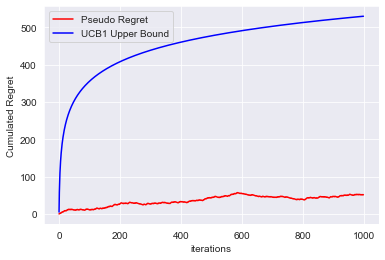

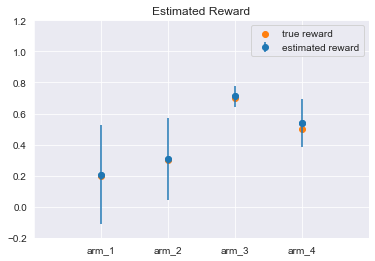

In [13]:
agent1 = IndependentAgent(1000, [0.2, 0.3, 0.7, 0.5])
agent1.start()
agent1.plot_regret()
agent1.plot_arm_view()

In [29]:
class Agent:
    def __init__(self, T, R):
        self.T = T #total amount of iterations
        self.R = R #
        self.n_arms = len(R)
        self.N = np.zeros(self.n_arms) #number of times an arm has been pulled
        self.U = np.ones(self.n_arms) #upper bound for each arm
        self.cum_r = np.zeros(self.n_arms) #summation of all the reward retrieved
        self.hat_R = np.zeros(self.n_arms) #estimation of the reward, simple average
        self.B = np.zeros(self.n_arms) #confidence bound of each arm
        self.ind = np.zeros(self.T) #keep tracks of the indices of the selected arm for each iteration
        self.rewards = np.zeros(self.T) #keep track of the reward for each iteration
        self.R_T = np.zeros(self.T) #keep track of the regret
        self.arms_label = ['arm_'+str(i) for i in range(1,self.n_arms+1)] #arms label used to plot charts
        self.UB = [] #UCB1 upper bound, Auer and Cesa-Bianchi
        
    def compute_upper_bound(self,t):
        delta = np.array( [max(self.R)] *  (self.n_arms)) - np.array(self.R)
        delta = delta[np.nonzero(delta)]
        self.UB.append(8 * sum(1 / delta) * np.log(t+1) + (1 + np.pi**2/3) * sum(delta))
    
    def compute_RB(self, t):
        for i in range(self.n_arms):
            self.hat_R[i] = self.cum_r[i]/self.N[i]
            self.B[i] = np.sqrt(2 * np.log(t+1) / self.N[i])
    
    def generate_one_sample(self, pulled_arm):
        return np.random.binomial(1,self.R[pulled_arm])

    def update_statistics(self, t, pulled_arm, outcome):
        self.rewards[t] = outcome
        self.ind[t] = pulled_arm
        self.N[pulled_arm] += 1
        self.cum_r[pulled_arm] += outcome
        self.R_T[t] = (max(self.R) * (t+1)) - sum(self.cum_r)
        self.compute_upper_bound(t)
    
    def plot_regret(self):
        plt.plot(self.R_T, 'r', label='Pseudo Regret')
        plt.plot(self.UB, 'b', label='UCB1 Upper Bound')
        plt.ylabel('Cumulated Regret')
        plt.xlabel('iterations')
        plt.legend()
        plt.show()
        
    def plot_arm_view(self):
        plt.ylim([-0.2, 1.2])
        plt.xlim([-1, 4])
        plt.scatter(self.arms_label, self.hat_R)
        plt.errorbar(self.arms_label, self.hat_R, yerr=self.B/2, fmt='o', label='estimated reward')
        plt.scatter(self.arms_label, self.R, label='true reward')
        plt.title('Estimated Reward')
        plt.legend()
        plt.show()

In [30]:
#iterations is the total amount of iterations
#period defines when the reward changes for each arm
#R array of the initial reward

class MultiAgentUCB:
    def __init__(self, iterations, period, n_arms):
        self.iterations = iterations
        self.period = period
        self.n_arms = n_arms
        self.agents = []
        self.global_U = np.ones(self.n_arms) #upper bound for each arm
        self.global_hat_R = np.zeros(self.n_arms) #estimation of the reward, simple average
        self.global_B = np.zeros(self.n_arms) #confidence bound of each arm
    
    def add_agent(self, agent):
        if(agent.n_arms == self.n_arms):
            self.agents.append(agent)
            print('Agent added!')
        else:
            print('Agent is not suitable!')
    
    def start(self):
        for t in range(self.iterations):
            for a in range(len(self.agents)):
                
                #each agent computes R and B
                self.agents[a].compute_RB(t)
                
                #global arm selection
                if(t < self.n_arms):
                    pulled_arm = t
                else:
                    for i in range(self.n_arms):
                        self.global_U[i] = min(1, self.agents[a].hat_R[i] + self.agents[a].B[i])
                    pulled_arm = np.argmax(self.global_U)
                
                self.agents[a].update_statistics(t, pulled_arm, self.agents[a].generate_one_sample(pulled_arm))
                
        for a in range(len(self.agents)):
            self.agents[a].plot_regret()
            self.agents[a].plot_arm_view()

Agent added!


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


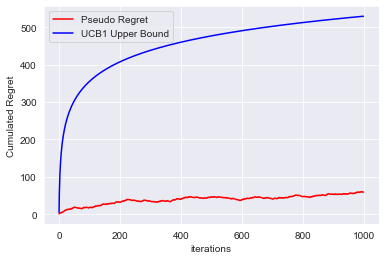

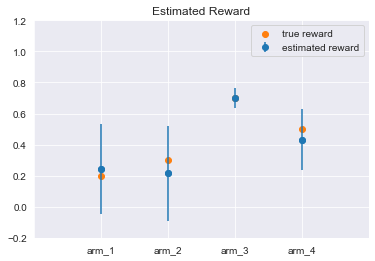

In [31]:
#Test with only one agent
agent2 = Agent(1000, [0.2, 0.3, 0.7, 0.5]) 
multi = MultiAgentUCB(1000,50,4)
multi.add_agent(agent2)
multi.start()

In [6]:
class DataAnalysis:
    def __init__(self, T, r, distribution, time_variation):
        self.T = T
        self.r = r
        self.real_rewards = np.zeros(self.T)
        self.rewards = np.zeros(self.T)
        self.running_avg = np.zeros(self.T)
        self.distribution = distribution
        self.time_variation = time_variation
    
    def generate_one_sample(self,t):
        if (self.distribution == 'Binomial'):
            return np.random.binomial(1,self.real_rewards[t])
        if (self.distribution == 'Gaussian'):
            return np.random.normal(self.real_rewards[t], 0.05, 1)
        
    def change_reward(self):
        for t in range(self.T):
            if(self.time_variation == 'step'):
                #if((t+1)%self.p == 0):
                    #self.r = np.random.randint(1,100)/100
                self.real_rewards[t] = self.r[(math.floor(t/(self.T/len(self.r))))]
            elif(self.time_variation == 'pos_log'):
                self.real_rewards[t] = self.r[(math.floor(t/(self.T/len(self.r))))] + (np.log(t+1))/(2*np.log(self.T))
            elif(self.time_variation == 'neg_log'):
                self.real_rewards[t] = self.r[(math.floor(t/(self.T/len(self.r))))] - (np.log(t+1))/(2*np.log(self.T))
    
    def generate_samples(self):
        self.change_reward()
        for t in range(self.T):
            outcome = self.generate_one_sample(t)
            self.rewards[t] = outcome
            self.running_avg[t] = np.sum(self.rewards) / (t+1)
        
    
    def plot_average(self):
        if(self.distribution=='Binomial'):
            plt.plot(self.real_rewards, 'r', label='Real Positive Reward Probability')
        if(self.distribution=='Gaussian'):
            plt.plot(self.real_rewards, 'r', label='Mean of the Gaussian')
        plt.plot(self.running_avg, 'b', label='Estimated Rewards Distribution')
        plt.title(self.distribution)
        plt.ylim([0, 1])
        plt.ylabel('Rewards')
        plt.xlabel('iterations')
        plt.legend()
        plt.show()        

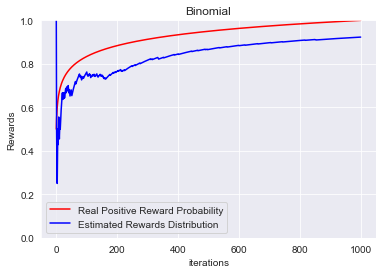

In [7]:
da = DataAnalysis(1000, [0.5], 'Binomial', 'pos_log')
da.generate_samples()
#[0.2, 0.25, 0.28, 0.3, 0.5, 0.31, 0.2, 0.36, 0.3, 0.4, 0.5, 0.55, 0.7, 0.69, 0.1, 0.7, 0.4, 0.5, 0.48, 0.47]
da.plot_average()